In [1]:
import pandas as pd
import numpy as np
import statistics
import category_encoders as ce

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('data/wine_cleared.csv')

# display(data.head())
display(data['price'].min())

# calculation of median using Statistics library
print(statistics.median(data['price']))

# calculation of median by standart Phyton tools
len_price = len(data['price'])
sorted_price = sorted(data['price'])

if len_price % 2:
    median = sorted_price[round(0.5 * (len_price-1))]
else:
    index = sorted_price[round(0.5 * len_price)]
    median = 0.5 * (sorted_price[index-1] + sorted_price[index])
    
print(median)

# calculation of mode using Statistics library
print(round(statistics.mode(data['price']),2))

# calculation of mode by Standart Python tools
print(round(data['price'].mode()[0],2))

mode = data['price'].value_counts()
display(round(mode.index[0],2))

# computing pairwise correlation
data.corr()


In [ ]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [ ]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [ ]:
data = pd.read_csv('data/wine_cleared.csv')

# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0) # разбор категорий
data['is_france'] = data['country'].apply(lambda x: 1 if x == "France" else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == "Italy" else 0)

# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
#print(data['old_wine'].sum())

regex = '\(([^)]*)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)
display(data.head())

In [ ]:
country_population = pd.read_csv('data/country_population.csv', sep=';')
display(country_population.loc[country_population['country'] == 'Italy'])

country_area = pd.read_csv('data/country_area.csv', sep=';')

data = data.join(country_population.set_index('country'), on='country')
data = data.join(country_area.set_index('country'), on='country')

data.rename(columns={"area": "area_country"}, inplace=True)

display(data.head())

In [ ]:
display(data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area_country'])

data['year'] = pd.to_datetime(data['year'])
data['years_diff'] = (pd.to_datetime("2022-01-12") - data['year']).dt.days
data['years_diff'].max()

In [ ]:
#data = data.sort_values(by=['year']) # вариант сортировки

ord_encoder = ce.OrdinalEncoder(cols=['year'])
date_bin = ord_encoder.fit_transform(data[['year']])
data = pd.concat([data, date_bin], axis=1)

data

In [ ]:
encoder = ce.OneHotEncoder(cols=['taster_name'])
name_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, name_bin], axis=1)

data

In [ ]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
country_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, country_bin], axis=1)

data

In [ ]:
encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

data

In [ ]:
%matplotlib inline
matplotlib.style.use('ggplot')

col_names = list(data.columns)

r_scaler = preprocessing.RobustScaler()
data_r = r_scaler.fit_transform(pd.DataFrame(data = data['price']))
print(data_r.sum())
data_r = pd.DataFrame(data_r, columns=['price'])
data_r



In [ ]:
scaler = preprocessing.RobustScaler()
data_r = scaler.fit_transform(data[['price']])
data_r = pd.DataFrame(data_r, columns=['price'])
data_r


In [ ]:
# нормализация признака на месте, в пределах DataFrame

data_copy = data.copy()

scaler = preprocessing.RobustScaler()
data_copy['price'] = scaler.fit_transform(data_copy[['price']])
data_copy

In [ ]:
s_scaler = preprocessing.StandardScaler()
data_s = s_scaler.fit_transform(data[['price']])
data_s = pd.DataFrame(data_s, columns=['price'])
round(data_s['price'][129968],2)

In [ ]:
fig, axe = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(), annot=True, linewidths=3, ax=axe, vmin=-1, vmax=1, center= 0) # включаем отображение коэффициентов

In [ ]:
data = data.drop(['price_round', 'is_usa', 'is_france', 'is_italy', 'area_country'], axis=1)
fig, axe = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(), annot=True, linewidths=3, ax=axe, vmin=-1, vmax=1, center= 0) # включаем отображение коэффициентов

Корреляция и матрица корреляции

In [ ]:
from sklearn.metrics import matthews_corrcoef
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

round(matthews_corrcoef(x, y),2) # рассчитаем коэффициент корреляции Мэтьюса

In [ ]:
import seaborn as sns
data = pd.read_csv('data/model.csv')
data.corr()
#sns.heatmap(data.corr(), annot = True)
#sns.scatterplot(data=data, x="Waist/Hip", y="Waist")
sns.scatterplot(data=data, x="Weight", y="Year")

In [ ]:
data.corr(method='kendall')

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

In [ ]:
print(round(statistics.mean(data['Weight']),2))
print(round(statistics.mean(data['Height']),2))

In [ ]:
sns.heatmap(data.corr(), annot = True)

4.) Создание признаков. Работа с форматом «дата-время»

In [ ]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds

calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

calls

5.) Кодирование признаков. Методы

In [ ]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])

ord_encoder = ce.OrdinalEncoder(cols=['size'])
data_bin = ord_encoder.fit_transform(clothing['size'])
clothing = pd.concat([clothing, data_bin], axis=1)
clothing


In [ ]:
encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing


In [ ]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

In [ ]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)

df


6.) Преобразование признаков. Нормализация. Стандартизация

In [ ]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [ ]:
df.describe() # зафиксируем описательные статистики до преобразований

MINMAXSCALER

In [ ]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

ROBUSTSCALER

In [ ]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

STANDARDSCALER

In [ ]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

7.) Отбор признаков. Мультиколлинеарность

In [ ]:
iris = pd.read_csv('data/iris.csv')

#sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)

iris.head()
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

8.) Проверка знаний

In [2]:
heart = pd.read_csv('data/heart.csv')

heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
#print('Количество пациентов, старше 60 лет, составляет', heart['old'].sum())

def set_avg_trestbps(x):
    if x['sex'] == 1:
        if x['age'] == 20:
            return 123
        if 20 < x['age'] <= 30:
            return 126
        if 30 < x['age'] <= 40:
            return 129
        if 40 < x['age'] <= 50:
            return 135
        if 50 < x['age'] <= 60:
            return 142
        if x['age'] > 60:
            return 142
    if x['sex'] == 0:
        if x['age'] == 20:
            return 116
        if 20 < x['age'] <= 30:
            return 120
        if 30 < x['age'] <= 40:
            return 127
        if 40 < x['age'] <= 50:
            return 137
        if 50 < x['age'] <= 60:
            return 144
        if x['age'] > 60:
            return 169

heart['trestbps_mean'] = heart.apply(set_avg_trestbps, axis=1)

heart.describe()
    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,142.792079
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,10.214569
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,169.000000


In [3]:
encoder = ce.OneHotEncoder(cols=['cp','restecg', 'slope', 'ca', 'thal'])
cols = encoder.fit_transform(heart[['cp','restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, cols], axis=1)

heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


<AxesSubplot:xlabel='age', ylabel='Count'>

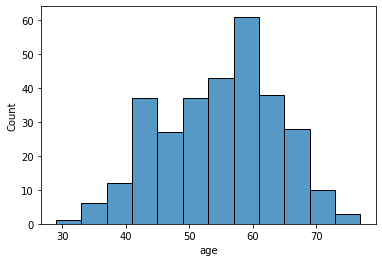

In [4]:
sns.histplot(heart['age'])

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

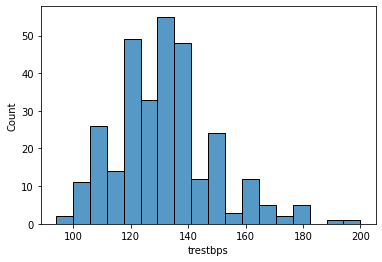

In [5]:
sns.histplot(heart['trestbps'])

<AxesSubplot:xlabel='chol', ylabel='Count'>

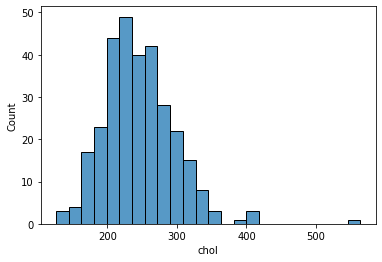

In [6]:
sns.histplot(heart['chol'])

<AxesSubplot:xlabel='thalach', ylabel='Count'>

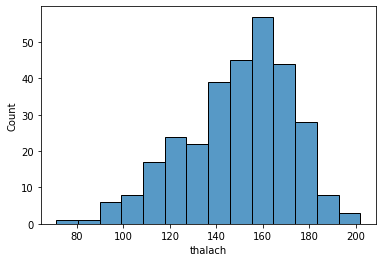

In [7]:
sns.histplot(heart['thalach'])

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

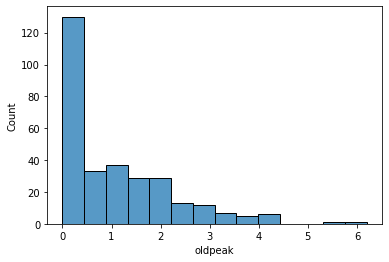

In [8]:
sns.histplot(heart['oldpeak'])

<AxesSubplot:xlabel='trestbps_mean', ylabel='Count'>

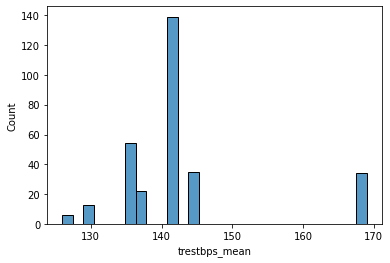

In [9]:
sns.histplot(heart['trestbps_mean'])

In [22]:
# инициализируем нормализатор RobustScaler
scaler = preprocessing.RobustScaler()

heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean']] = scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean']])

round(heart['chol'].std(), 6)

0.816232

<AxesSubplot:>

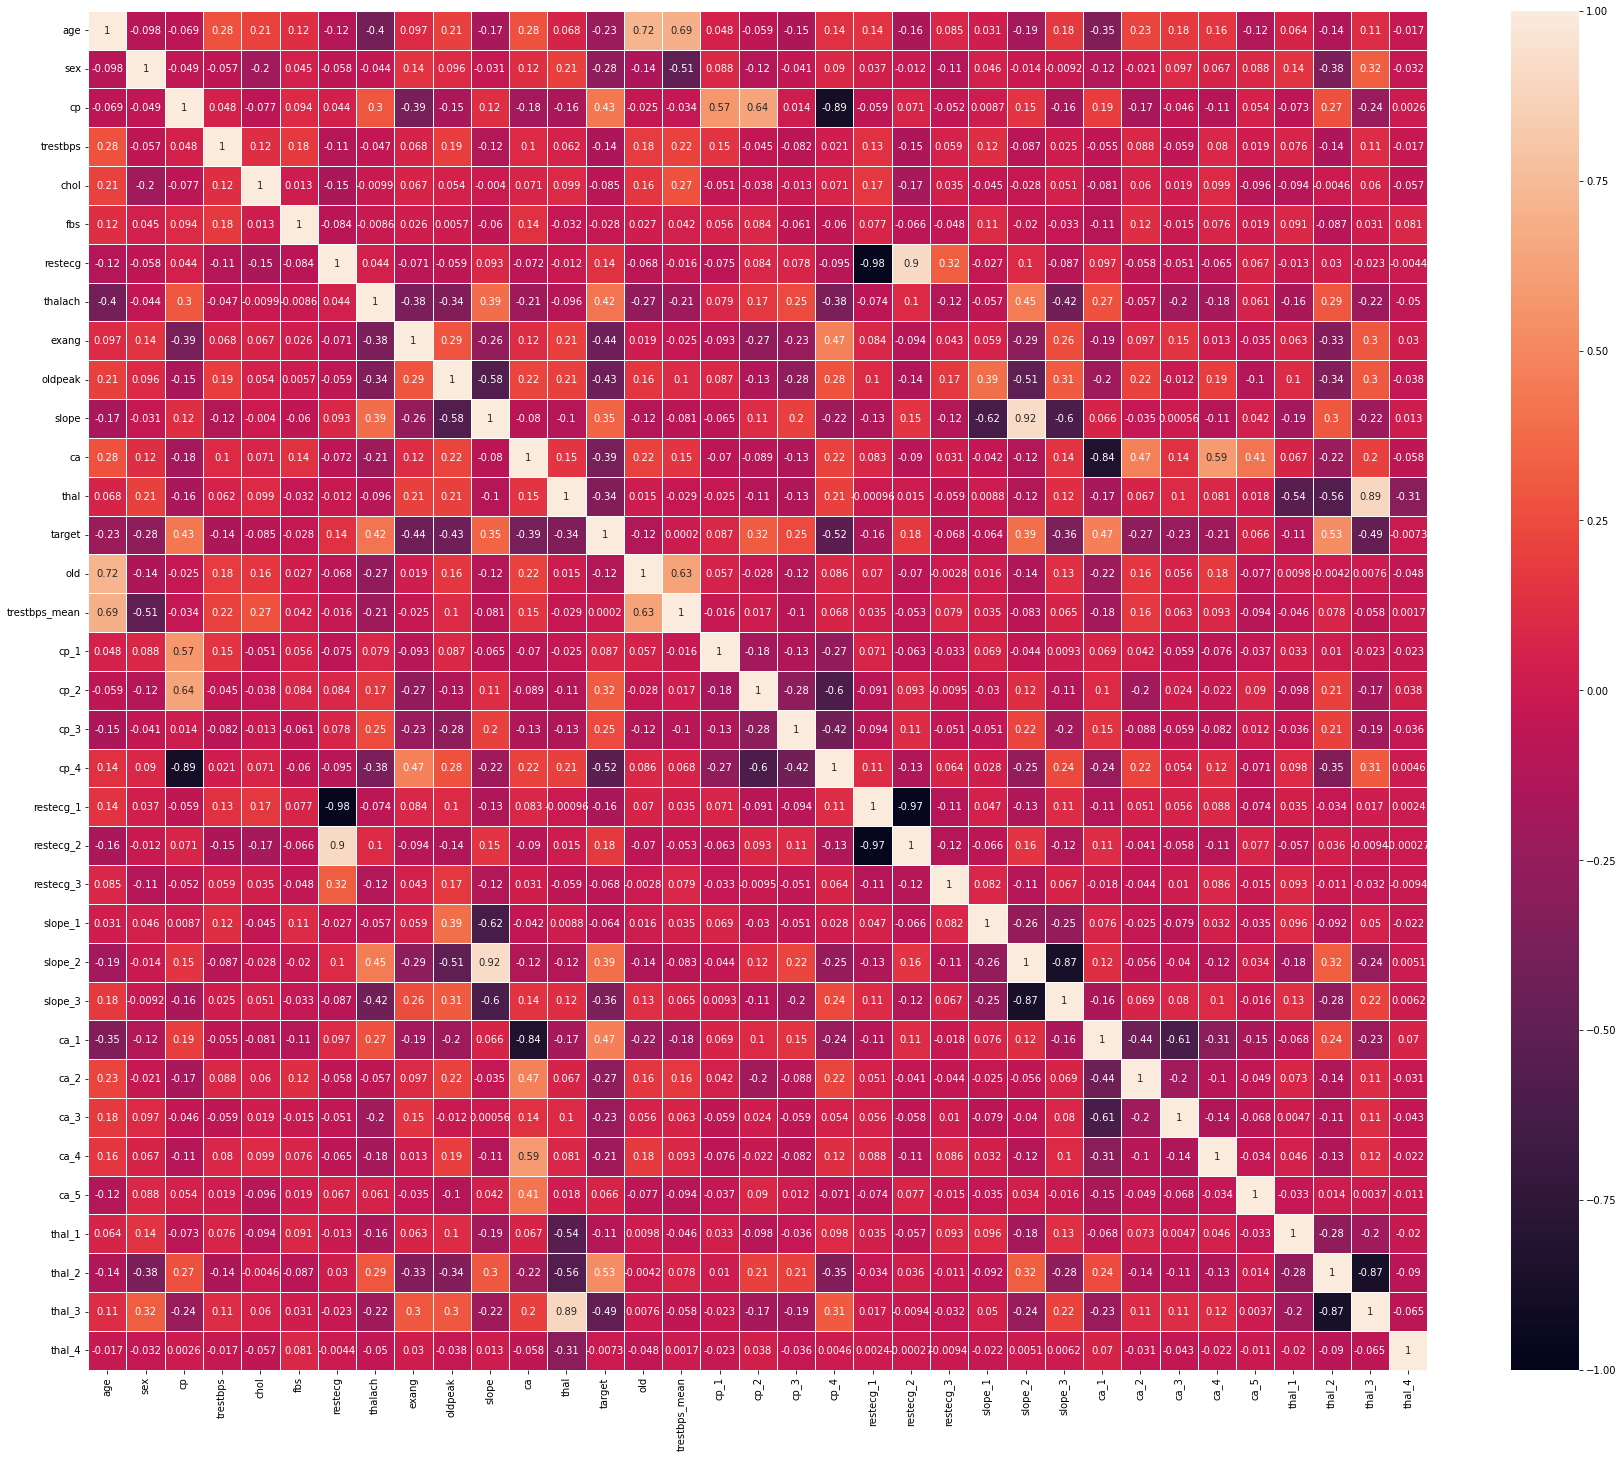

In [21]:
fig, axe = plt.subplots(figsize=(30,25))
sns.heatmap(heart.corr(), annot=True, linewidths=1, ax=axe, vmin=-1, vmax=1)

In [25]:
heart = heart.drop(['old', 'restecg', 'cp', 'slope', 'ca', 'thal'], axis=1)

<AxesSubplot:>

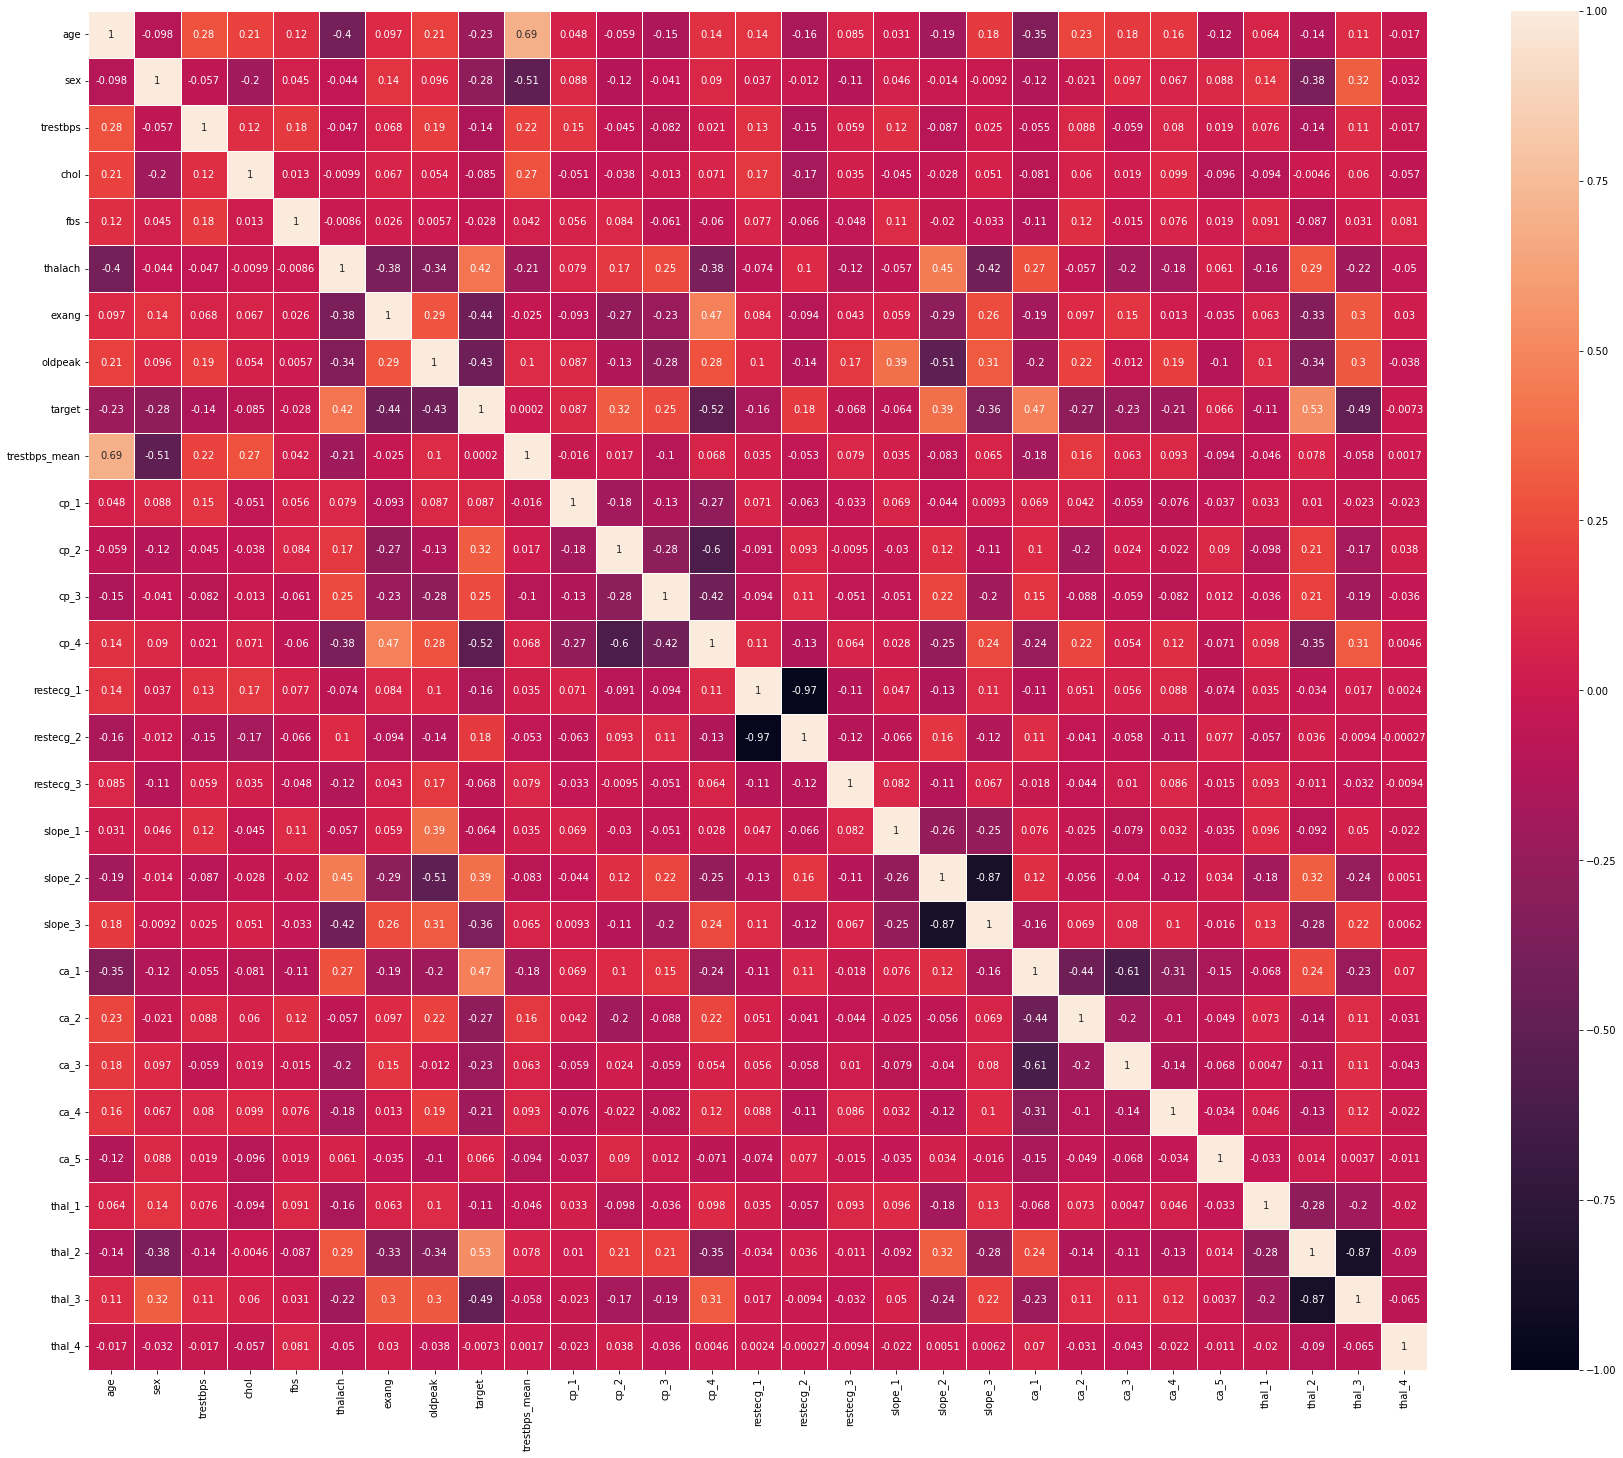

In [26]:
fig, axe = plt.subplots(figsize=(30,25))
sns.heatmap(heart.corr(), annot=True, linewidths=1, ax=axe, vmin=-1, vmax=1)

In [27]:
heart = heart.drop(['restecg_1', 'slope_2', 'thal_2'], axis=1)

<AxesSubplot:>

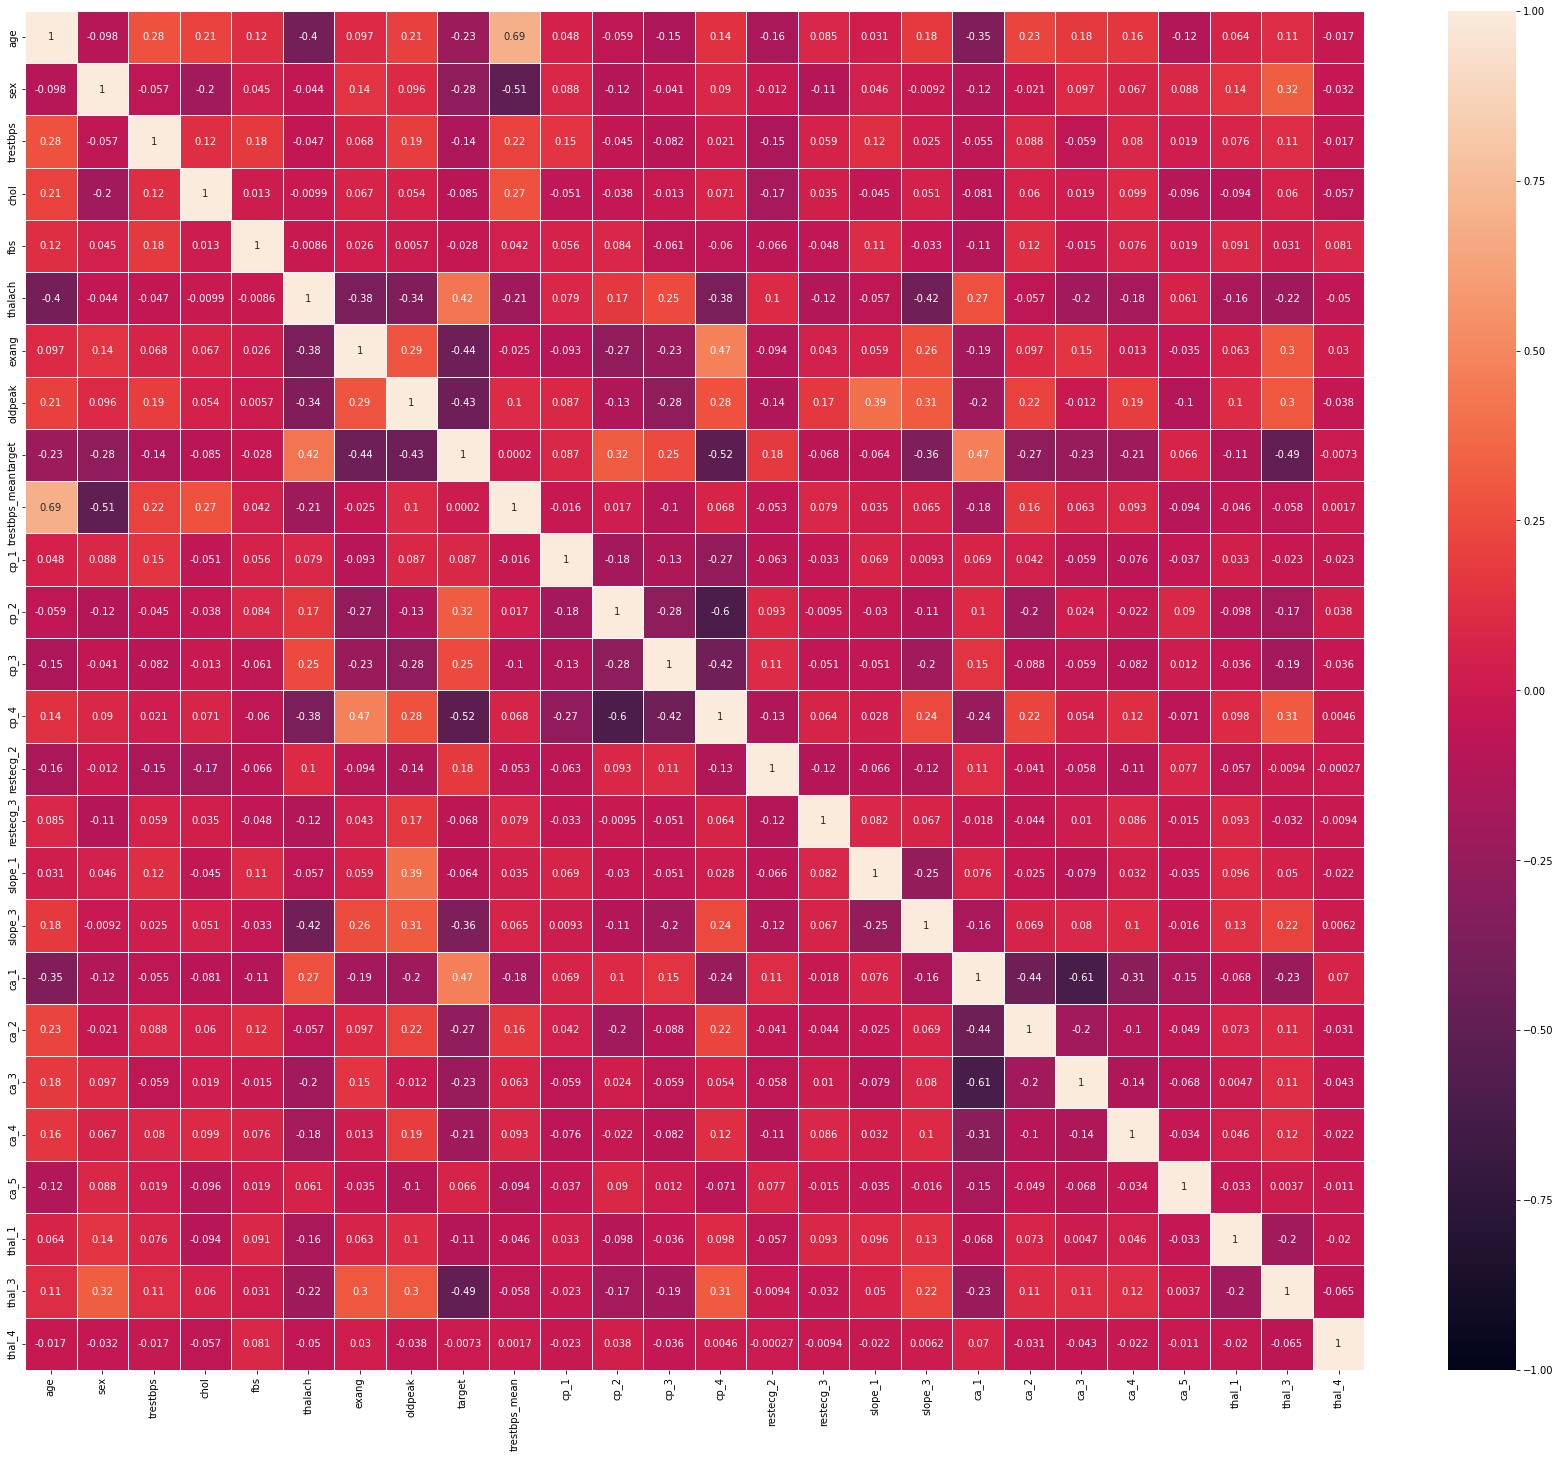

In [28]:
fig, axe = plt.subplots(figsize=(30,25))
sns.heatmap(heart.corr(), annot=True, linewidths=1, ax=axe, vmin=-1, vmax=1)